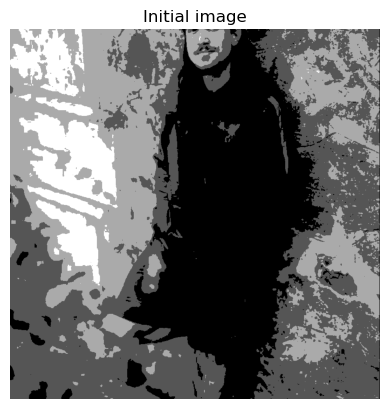

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import clear_output

IMAGE_PATH = 'target_image.jpg'
SHADES_OF_GREY = 5 #poti modifica asta pt eficienta sau estetica
orig = Image.open(IMAGE_PATH).convert('RGB')
w, h = orig.size
min_dim = min(w, h)
left = (w - min_dim) // 2
upper = (h - min_dim) // 2
crop = orig.crop((left, upper, left + min_dim, upper + min_dim))
gray = crop.convert('L')
arr_gray = np.array(gray)
levels = np.floor(arr_gray.astype(float) * SHADES_OF_GREY / 256).astype(int)
target = levels
IMG_SIZE = target.shape[0]
GENOME_LENGTH = IMG_SIZE * IMG_SIZE
plt.imshow(target, cmap='gray', vmin=0, vmax=SHADES_OF_GREY-1)
plt.title("Initial image")
plt.axis('off')
plt.show()

In [7]:
fact = 10 #factorul care da cat de mare sa fie fiecare (10 in mod normal)
GEN_SIZE = 20 * fact
KEEP = 2 * fact
NEXT_GEN = 10 * fact
MUTATIONS = 10 * fact
FLAT_LINE = 100
MAX_GENS = 10000

In [9]:
def score(ind):
    img_arr = ind.reshape((IMG_SIZE, IMG_SIZE)).astype(int)
    diff = np.abs(img_arr - target)
    return np.sum((SHADES_OF_GREY - 1) - diff)

In [11]:
population = np.random.randint(0, SHADES_OF_GREY, (GEN_SIZE, GENOME_LENGTH), dtype=int)

def cross(a, b):
    mask = np.random.randint(0, 2, GENOME_LENGTH, dtype=bool)
    return np.where(mask, a, b)

def mutate(ind):
    idx = random.randrange(GENOME_LENGTH)
    ind[idx] = random.randrange(SHADES_OF_GREY)

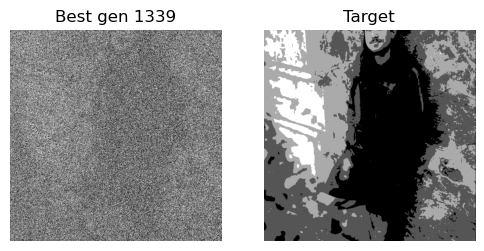

Gen 1339, best score: 1363732 / 2131947 => 63.96650573396055% done


In [ ]:
plt.ion()
best_scores = []
same = 0
old_best = None

for gen in range(MAX_GENS):
    scores = np.array([score(ind) for ind in population])
    order = np.argsort(-scores)
    population = population[order]
    scores = scores[order]
    best = scores[0]
    best_scores.append(best)
    if gen % 1 == 0:
        clear_output(wait=True)
        best_img = population[0].reshape((IMG_SIZE, IMG_SIZE)).astype(int)
        plt.figure(figsize=(6, 3))
        plt.subplot(1, 2, 1)
        plt.imshow(best_img, cmap='gray', vmin=0, vmax=SHADES_OF_GREY-1)
        plt.title(f"Best gen {gen}")
        plt.axis('off')
        plt.subplot(1, 2, 2)
        plt.imshow(target, cmap='gray', vmin=0, vmax=SHADES_OF_GREY-1)
        plt.title("Target")
        plt.axis('off')
        plt.show()
        print(f"Gen {gen}, best score: {best} / {(SHADES_OF_GREY-1)*IMG_SIZE*IMG_SIZE} => {100*best/((SHADES_OF_GREY-1)*IMG_SIZE*IMG_SIZE)}% done")
    if old_best is None or best != old_best:
        same = 0
    else:
        same += 1
    if same >= FLAT_LINE:
        break
    old_best = best
    elites = population[:KEEP].copy()
    probs = scores[:NEXT_GEN].astype(float)
    probs = probs / probs.sum()
    parents_idx = np.random.choice(NEXT_GEN, size=(GEN_SIZE - KEEP, 2), p=probs)
    children = np.array([cross(population[i], population[j]) for i, j in parents_idx], dtype=int)
    population = np.vstack((elites, children))
    for _ in range(MUTATIONS):
        idx = random.randrange(KEEP, GEN_SIZE)
        mutate(population[idx])


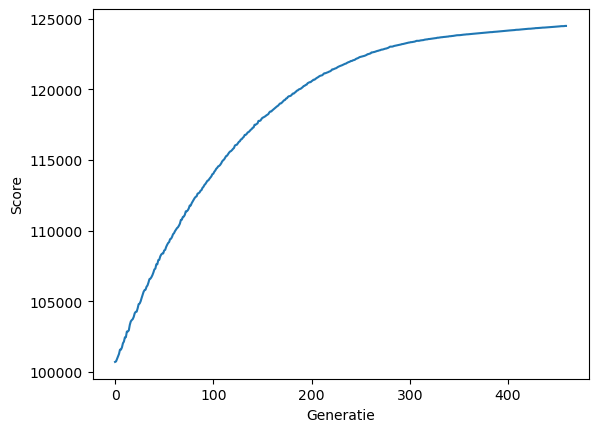

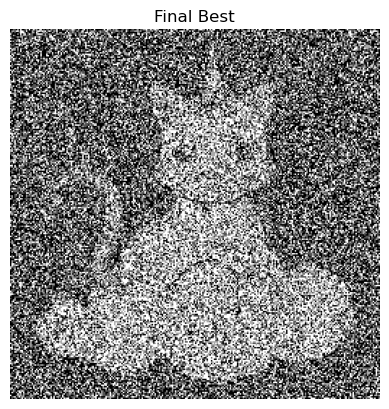

In [127]:
plt.ioff()
plt.close('all')
plt.plot(best_scores)
plt.xlabel("Generatie")
plt.ylabel("Score")
plt.show()

best_ind = population[0]
best_img = best_ind.reshape((IMG_SIZE, IMG_SIZE)).astype(int)
plt.imshow(best_img, cmap='gray', vmin=0, vmax=SHADES_OF_GREY-1)
plt.title("Final Best")
plt.axis('off')
plt.show()